# Arboles
---
Métodos Basados en Árboles
Los árboles binarios son el componente básico de la mayoría de los métodos estadísticos basados en árboles.\ Binario quiere decir, que cada rama del árbol puede ser dividido dentro de 2 sub-ramas Estos árboles son comúnmente referidos a árboles de decisión.

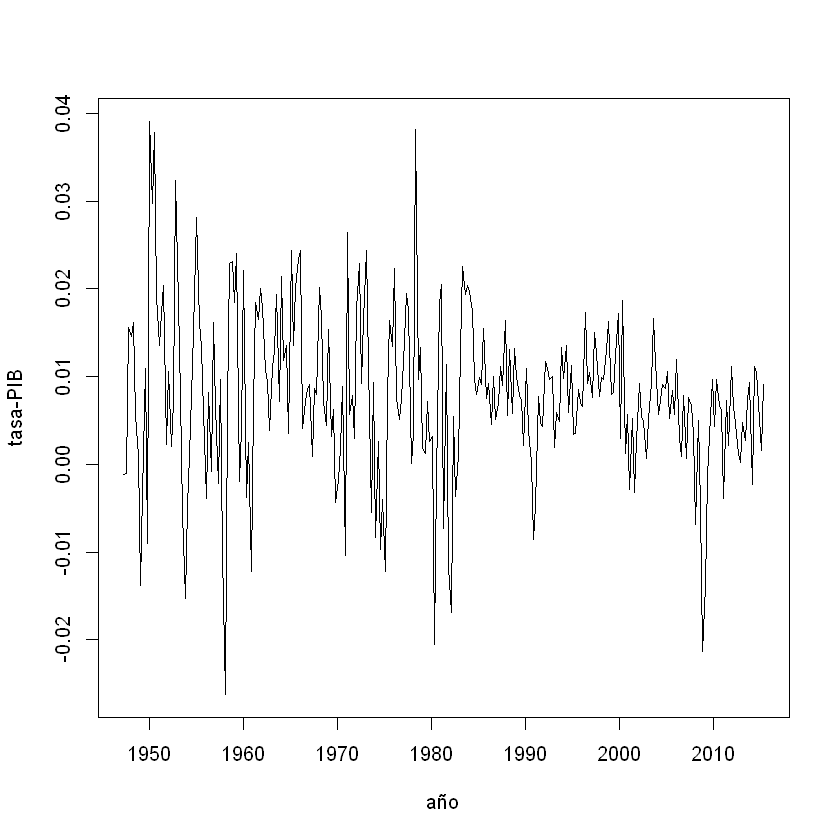

In [1]:
da=read.table("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\series de tiempo\\codigos\\GDPC1.txt",header=T) 
gdp = diff(log(da$rgdp))
tdx = da$year + (da$mon/12)
tdx = tdx[-1]
plot(tdx,gdp,xlab='año',ylab='tasa-PIB',type='l') 

In [2]:
length(gdp)

[1] 273

## Configuración y Arbol
---

Lo que se hizo fue multuplicar a gdp por 100 para poder describir los crecimientos en términos de porcntajes $gdp*100$ y su redondeo. Luego para definir las covariables se tiene:

         cbind(gdp[4:273],gdp[3:272],gdp[2:271],gdp[1:270])
         
Haciendo corrspondencia a que el modelo está determinado por:

$$Y_t = g(y_{t-1} , y_{t-2} , t_{t-3}) + a_t$$

se tiene que:

        "gdp": $y_t$  ,    "gdp1": $y_{t-1}$     ,"gdp2" : $y_{t-2}$       ,"gdp3" : $y_{t-3}$  

Es importante destacar que se debe iniciar desde el tiempo $t=4$ porque hay 3 condiciones iniciales.

In [6]:
gdp = round(gdp*100,2)
X = cbind(gdp[4:273],gdp[3:272],gdp[2:271],gdp[1:270])
colnames(X) = c("gdp","gdp1","gdp2","gdp3")
require(tree)

In [7]:
t1 = tree(gdp~.,data=data.frame(X))
summary(t1)


Regression tree:
tree(formula = gdp ~ ., data = data.frame(X))
Number of terminal nodes:  11 
Residual mean deviance:  6654 = 1723000 / 259 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-327.300  -46.200   -3.298    0.000   51.020  325.700 

Según la descripción anterior, se puede establecer que salieron 11 = nodos terminales.

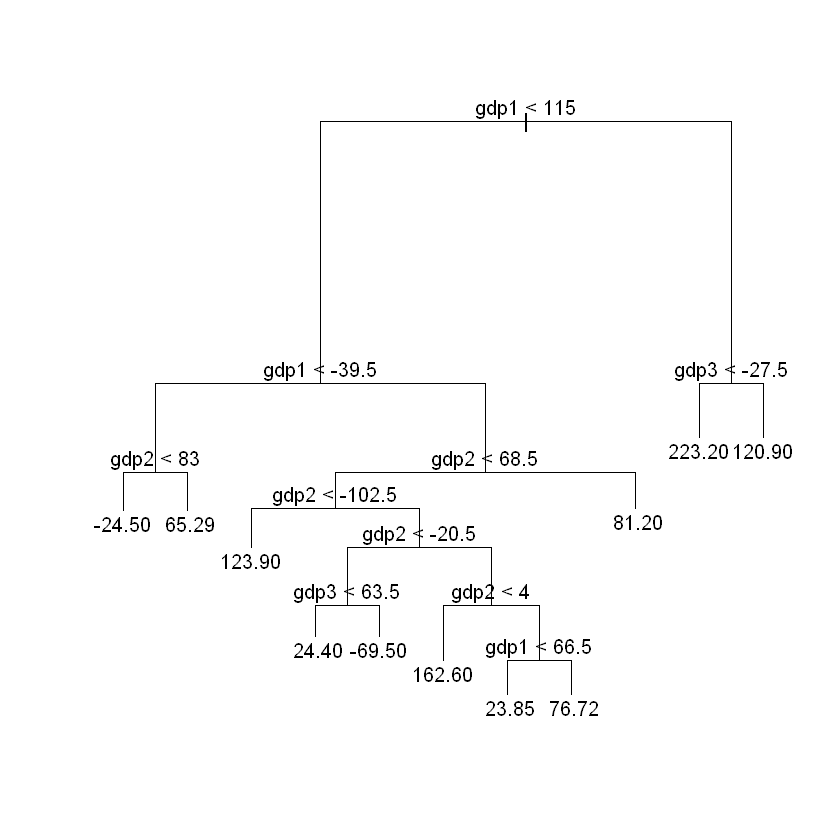

In [8]:
plot(t1)
text(t1,pretty=0)

## Ejemplo completo 
---

Considere la medición diaria de PM2.5 (materia particular fina con un diámetro menor a 2.5 mm) de Shanghai, China, desde el 1 de enero de 2013 al 31 de mayo de 2017. Los datos originales son por hora, medidos en unidades (𝜇g / m3), y se puede descargar de www.stateair.net, que es parte del programa de monitoreo de la calidad del aire del Departamento de Estado de EE. UU.\ Tomamos el promedio de datos por hora como la medida de PM2.5 para un día determinado. Para simplificar el análisis, eliminamos la observación del 29 de febrero de 2016 para que cada año tenga el mismo número de observaciones.\ Se toman 365 observaciones, es decir el último año como muestra de prueba, es decir nos quedan 1246 para el entrenamiento.\ En el árbol, se ve que la variable rezago-1 yt_1 es la variable explicativa más importante, y las variables rezagadas estacionales yt_370 y yt_367 también son importantes.

Tengase que es una serie diaria.

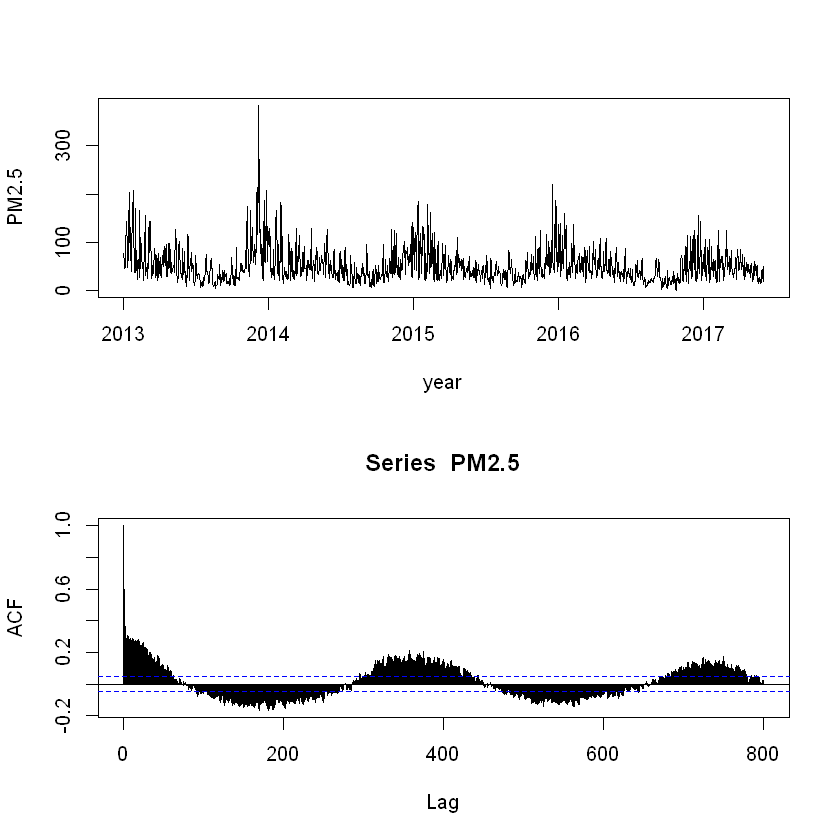

In [14]:
library(NTS)    #usado para dividir la información en validacion y entrenmiento
PM2.5 = scan(file="C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\series de tiempo\\codigos\\d-Shanghai-1317.txt")
tdx = c(1:length(PM2.5))/365+2013
par(mfcol=c(2,1))
plot(tdx,PM2.5,xlab='year',ylab='PM2.5',type='l') 
acf(PM2.5,lag=800)###Chequeamos un ciclo anual

Anteriormente se muestra las graficas de autocorrelación hasta el rezago 800, viendose una estructura de autocorrelación se muestra que casi todos los rezagos son significativos. El ciclo es de aproximadamente de 1 año.

Segun los autores, se toman unos rezagos dependiendo la función de autocorrelacion.En este orden de ideas se toman:

        los rezagos del 1-10 de la variable original para ayudar a predecir (estas serán covariables) . 
        Los rezagos del 365 a 370 que (serán covariables, usadas mas que todo para modelar el ciclo estacional). 
        En total 16 covariables.
        E.O.P  y_1,....,y_10,  para tomar las variables con mayor rezago y y_365,..,y_370  del ciclo estacional
        
La función **NNsetting** ayudará para llevar esta metodología al ambito de aprendizaje supervisado, se le ingresa la serie *PM2.5* y se especifican las covariables, el nfore=365 es para destacar que serán los ultimso datos para el tema de validacion.

In [10]:
m1 = NNsetting(PM2.5,nfore=365,lags=c(1:10,365:370))###configuración prueba y entrenamiento al igual que las covariables.Es decir, los rezagos son y_1,....,y_10, y y_365,..,y_370, debido al ciclo anual.
names(m1)

[1] "X"     "y"     "predX" "predY"

In [15]:
summary(m1)

      Length Class  Mode   
X     14016  -none- numeric
y       876  -none- numeric
predX  5840  -none- numeric
predY   365  -none- numeric

    predX , predY : Son los valores que nos servirán de validación.

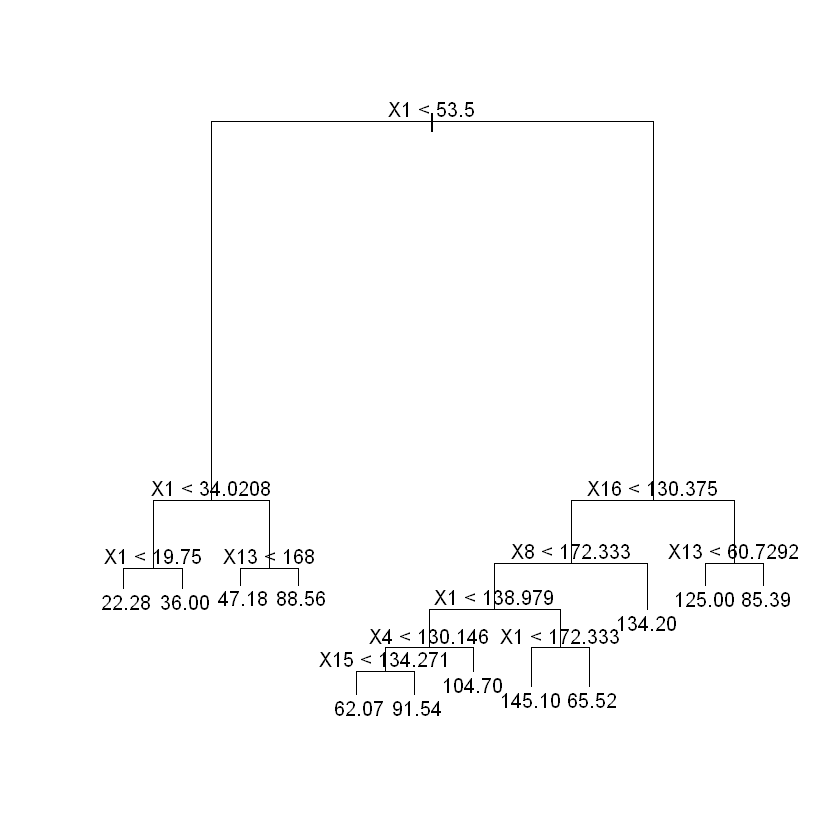

In [16]:
X= m1$X; y = m1$y; predX = m1$predX; predY = m1$predY
t1 = tree(y~.,data=data.frame(X))
par(mfcol=c(1,1))
plot(t1)
text(t1,pretty=0) 

In [20]:
head(y)      # Variables originales del conjunto de entrenamiento 
head(predX)  #covariables para la predición
head(predY)  #valores para la realizar la prueba

[1] 27.54167 46.20833 38.91667 34.29167 45.58333 45.45833

58.00000,56.08333,43.62500,30.66667,31.91667,88.91667,69.41667,87.75000,66.20833,50.25000,47.25000,49.00000,35.08333,28.16667,33.29167,42.00000
25.08333,58.00000,56.08333,43.62500,30.66667,31.91667,88.91667,69.41667,87.75000,66.20833,32.95833,47.25000,49.00000,35.08333,28.16667,33.29167
36.37500,25.08333,58.00000,56.08333,43.62500,30.66667,31.91667,88.91667,69.41667,87.75000,21.20833,32.95833,47.25000,49.00000,35.08333,28.16667
19.87500,36.37500,25.08333,58.00000,56.08333,43.62500,30.66667,31.91667,88.91667,69.41667,24.50000,21.20833,32.95833,47.25000,49.00000,35.08333
38.45833,19.87500,36.37500,25.08333,58.00000,56.08333,43.62500,30.66667,31.91667,88.91667,63.83333,24.50000,21.20833,32.95833,47.25000,49.00000
28.58333,38.45833,19.87500,36.37500,25.08333,58.00000,56.08333,43.62500,30.66667,31.91667,56.08333,63.83333,24.50000,21.20833,32.95833,47.25000


In [19]:
pt1 = predict(t1,newdata=data.frame(predX)) ###Predicción sobre la muestra de prueba
er3 = pt1-predY ###Errores de predicción
mean(abs(er3))

[1] 16.3767

In [20]:
sqrt(mean(er3^2)) ###Promedio de los errores de predicción al cuadrado

[1] 22.2729

## Residuales del Modelo
---

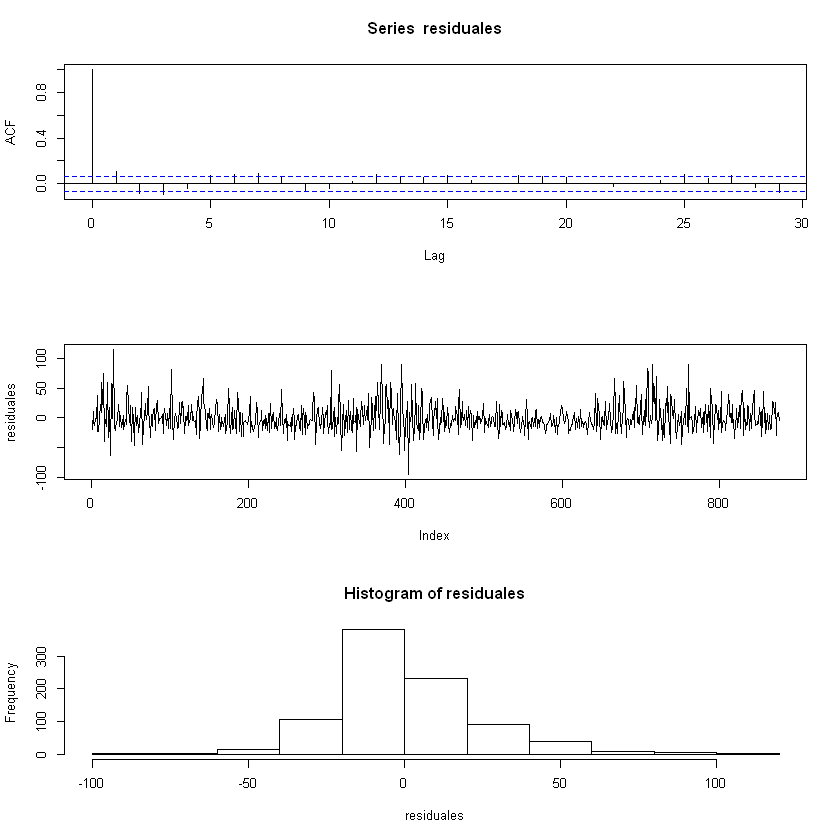

In [30]:
pp1 =predict(t1,newdata=data.frame(X))
residuales= y-pp1
par(mfrow=c(3,1))
acf(residuales)   #long.max=400
plot(residuales,type='l')
hist(residuales)

Se puede observar que los residuales del modelo son estacionarios, no obstante en la función de autocorrelacion se logra observar que los rezagos son no significativos, es decir que el arbol extrae y explica muy bien la estructura de correlación. El histograma de los residuales se esperan ser simetricos con respecto a cero y mejor si son normales.

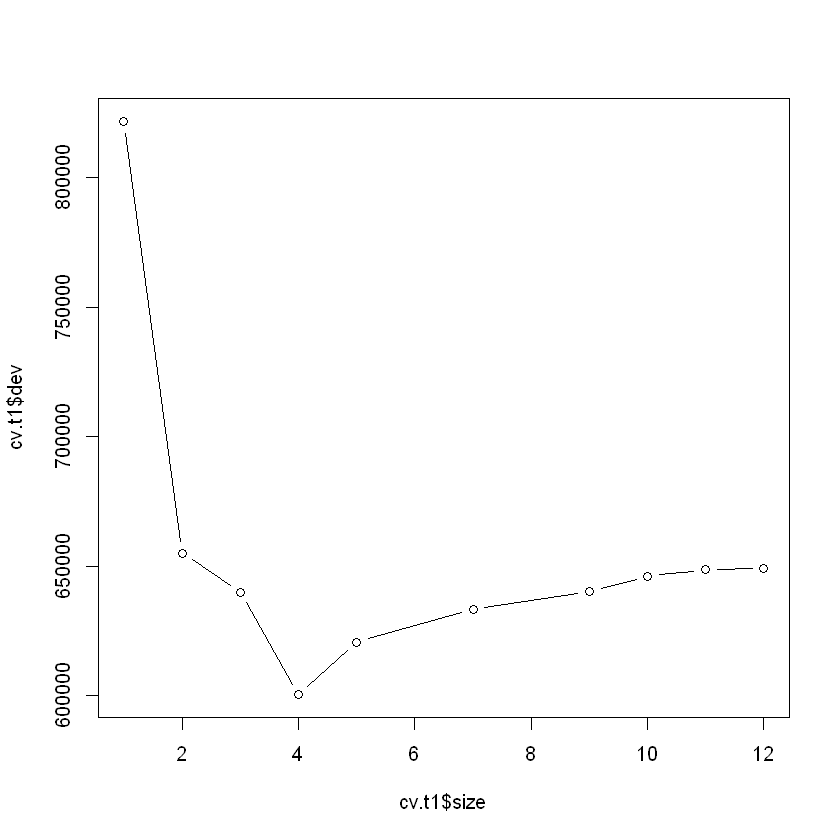

In [32]:
cv.t1 = cv.tree(t1)   #hace validacion cruzada con respecto a complejidad que es el numero de hojas
plot(cv.t1$size,cv.t1$dev,type="b")##Parece que el tamaño del árbol es 4

Tomando como criterio la validacion cruzada  con respecto al tamaño, la poda se realiza con el numero de ramas que se van construyendo, en especial la grafica muestra que el mejor valor es de 4 el cual minimiza la validacion cruzada. la poda debe realizarse en 4 hojas solamente.

Hagamois la gráfica del arbol ya podado:

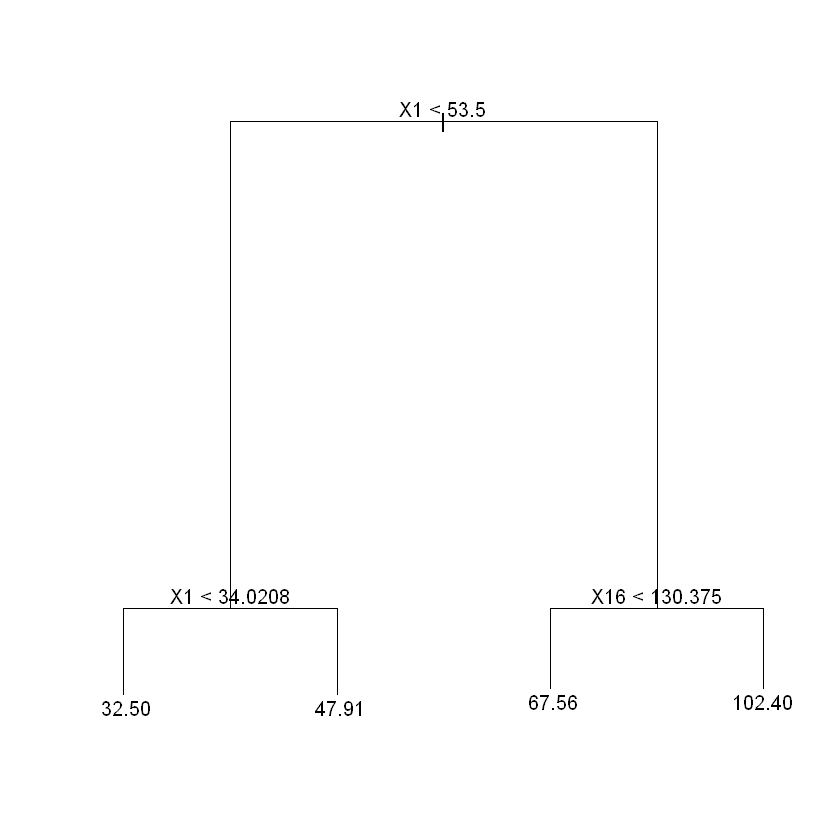

In [33]:
prune.t1= prune.tree(t1,best=4)
plot(prune.t1)   ####Gráfica de árbol con la poda
text(prune.t1,pretty=0)

In [25]:
prun = predict(prune.t1,newdata=data.frame(predX)) 
per =predY-prun
mean(abs(per))

[1] 17.11805

In [26]:
sqrt(mean(per^2))

[1] 22.03309

segun el valor de *sqrt(mean(per^2))=22.27* en el arbol sin podar,  se tiene que *sqrt(mean(per^2))=22.03* para el arbol podado mejora en el error cuadrático medio de las predicciones o residuales al cuadrado, lo que mejora el hecho del sobreajuste.

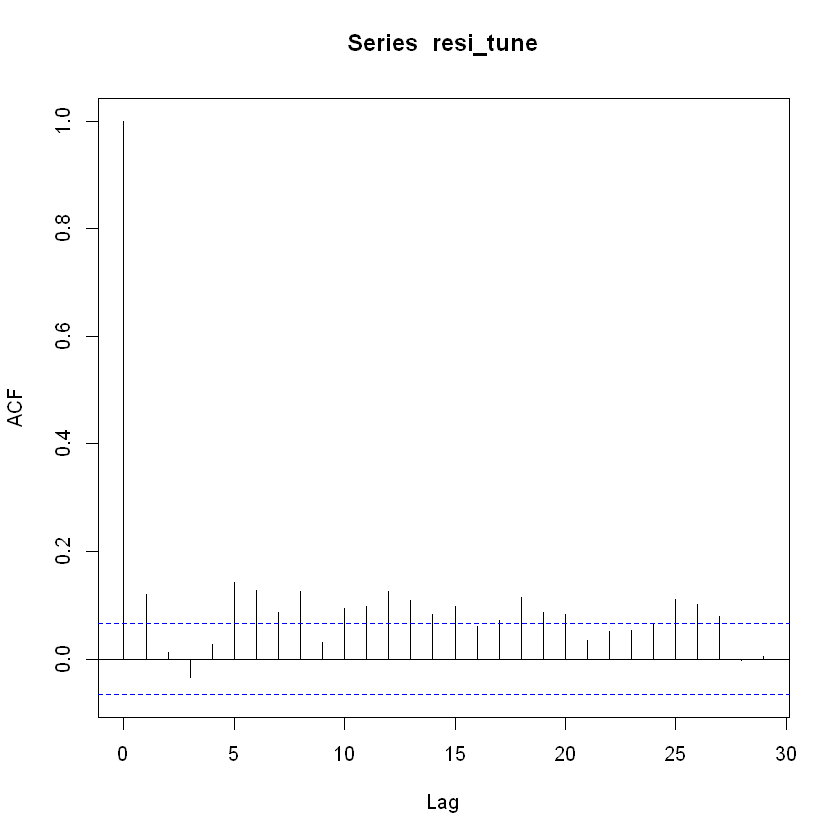

In [34]:
pp1_tune =predict(prune.t1,newdata=data.frame(X))
resi_tune= y-pp1_tune
acf(resi_tune)

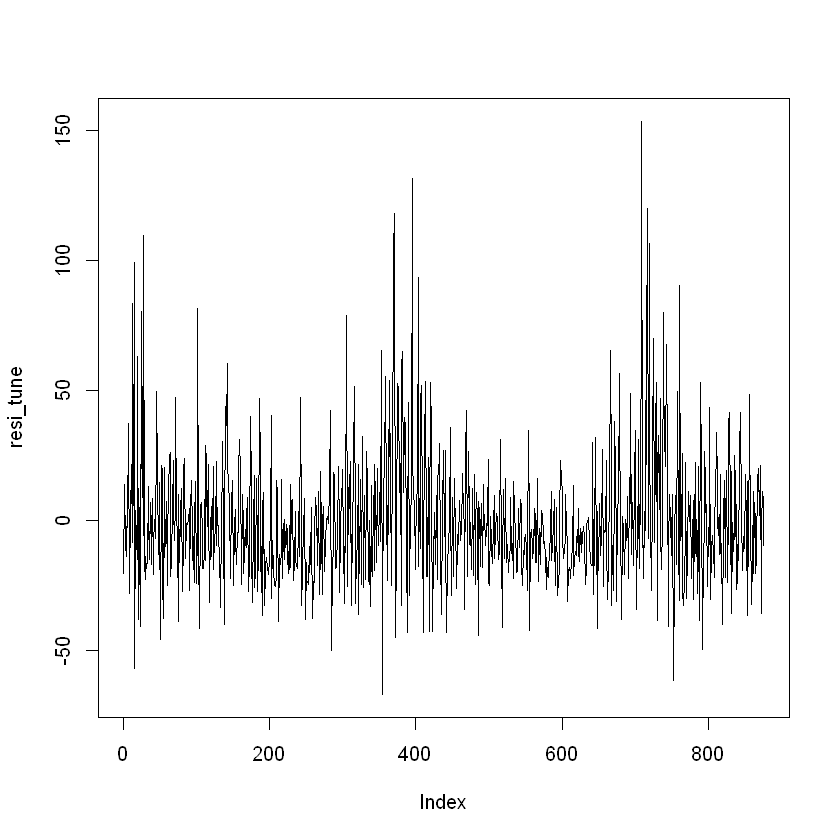

In [35]:
plot(resi_tune,type='l')

La poda no nos mejora muy bien el sobreajuste , sin embargo en otros tratamientos si.